In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns
import plotly.express as px
import os

%matplotlib inline

In [2]:
directory = r'Data\Extracted'
transformed = pd.DataFrame()

i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    print(r'Reading {} data'.format(f))
    transformed = pd.concat([transformed, pd.read_csv(f)], axis=0, ignore_index=True)
    i += 1
    
    if i == 4:
        break

Reading Data\Extracted\202004-divvy-tripdata.csv data
Reading Data\Extracted\202005-divvy-tripdata.csv data
Reading Data\Extracted\202006-divvy-tripdata.csv data
Reading Data\Extracted\202007-divvy-tripdata.csv data


In [4]:
transformed.shape

(1179535, 13)

In [16]:
84777 + 200275 + 343006 + 551458 + 622362 + 532959 + 388645 + 259717 + 131574 + 96835 + 49623 + 228497 + 337231 + 531634 + 729596 + 822411 + 804353 + 756148 + 631227 + 359979 + 247541 + 103771 + 115610 + 284043 + 371250 + 634859

10219381

In [5]:
def transform_data(df):

    # Removal of duplicate rows
    prev_rows = df.shape[0]
    df.drop_duplicates(subset=['ride_id'], inplace=True)
    print(prev_rows - df.shape[0], ' rows removed!')
    
    # Change datetime formats started_at, ended_at
    df['started_at'] = pd.to_datetime(df['started_at'], format= '%Y-%m-%d %H:%M:%S')
    df['ended_at'] = pd.to_datetime(df['ended_at'], format= '%Y-%m-%d %H:%M:%S')
    print('Formats of the dates have been modified.')
    
    # Convert that time in minutes
    df['ride_time'] = round(((df['ended_at'] - df['started_at']).dt.total_seconds()) / 60)
    print('Ride time has been calculated.')

    # Get year and month into one column
    df['year_month'] = df['started_at'].dt.year.astype(str) + ' - ' + df['started_at'].dt.month.astype(str)
    print('Calculated the starting month and day.')
    
    # Get the day of the week (Mon - 0, Tue - 1, ..., Sun - 6)
    df['weekday'] = df['started_at'].dt.weekday
    print('Calculated starting weekday.')
    
    # Get the start hour of the ride
    df['start_hour'] = df['started_at'].dt.hour
    print('Calculated start hour.')
    
    # Save the dataframe
    df.to_csv(r'Data\Transformed\Transformed.csv', index = False, encoding='utf-8')
    print('Transformed Data Saved Successfully.')


In [6]:
transform_data(transformed)

0  rows removed!
Formats of the dates have been modified.
Ride time has been calculated.
Calculated the starting month and day.
Calculated starting weekday.
Calculated start hour.
Transformed Data Saved Successfully.


In [16]:
transformed.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_time                    float64
year_month                    object
weekday                        int64
start_hour                     int64
dtype: object

In [2]:
data = pd.read_csv(r"Data\Transformed\Transformed.csv")

In [5]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [4]:
data.shape

(1179535, 17)

[Text(0.5, 0, 'Member Types'), Text(0, 0.5, 'Count')]

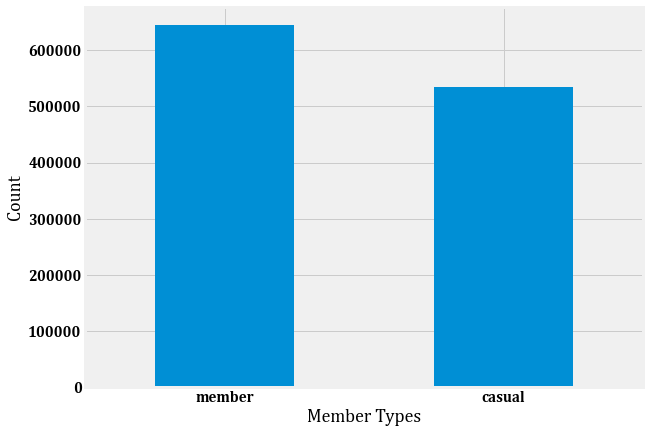

In [11]:
mp.figure(figsize=(10,7))
mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'weight' : 'bold',
        'size'   : 15}

mp.rc('font', **font)

count_plot = data["member_casual"].value_counts().plot.bar(rot=0)
count_plot.tick_params(color="black")
count_plot.set(xlabel="Member Types", ylabel="Count")

[Aggregate Pandas DataFrame with Condition using NamedAgg](https://stackoverflow.com/questions/65409213/aggregate-pandas-dataframe-with-condition-using-namedagg)

[Rarely Used Pandas Tricks](https://towardsdatascience.com/4-rarely-used-yet-very-useful-pandas-tricks-b43ef4b726fb)

In [30]:
group_data = data.groupby(['year_month'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data['mem_cas_p_diff'] = group_data['members_p'] - group_data['casual_p']
group_data['mem_cas_c_diff'] = group_data['members_c'] - group_data['casual_c']

In [31]:
group_data.head()

,year_month,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,2020 - 4,84776,7.187239,61148,23628,72.128904,27.871096,44.257809,37520
1,2020 - 5,200274,16.979064,113365,86909,56.604951,43.395049,13.209902,26456
2,2020 - 6,343005,29.079680,188287,154718,54.893369,45.106631,9.786738,33569
3,2020 - 7,551480,46.754017,282184,269296,51.168492,48.831508,2.336984,12888


<Figure size 1080x1080 with 0 Axes>

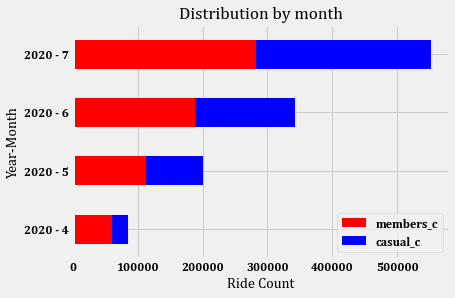

In [48]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'weight' : 'bold',
        'size'   : 12}

mp.rc('font', **font)

ax = group_data[['year_month', 'members_c', 'casual_c']].plot(kind='barh', stacked=True, color=['red', 'blue'])
ax.set_yticklabels(group_data['year_month'])
_ = mp.xlabel('Ride Count')
_ = mp.ylabel('Year-Month')
_ = mp.title('Distribution by month')

In [50]:
group_data_by_week_day = data.groupby(['weekday'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_week_day['mem_cas_p_diff'] = group_data_by_week_day['members_p'] - group_data_by_week_day['casual_p']
group_data_by_week_day['mem_cas_c_diff'] = group_data_by_week_day['members_c'] - group_data_by_week_day['casual_c']

In [53]:
group_data_by_week_day

,weekday,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,0,133922,11.353796,78437,55485,58.569167,41.430833,17.138334,22952
1,1,138533,11.744713,83840,54693,60.519876,39.480124,21.039752,29147
2,2,147297,12.487718,89669,57628,60.876325,39.123675,21.752649,32041
3,3,166402,14.107424,98356,68046,59.107463,40.892537,18.214925,30310
4,4,185622,15.736879,101650,83972,54.761828,45.238172,9.523656,17678
5,5,224672,19.047506,105855,118817,47.115350,52.884650,-5.769299,-12962
6,6,183087,15.521964,87177,95910,47.615068,52.384932,-4.769864,-8733


<Figure size 1080x1080 with 0 Axes>

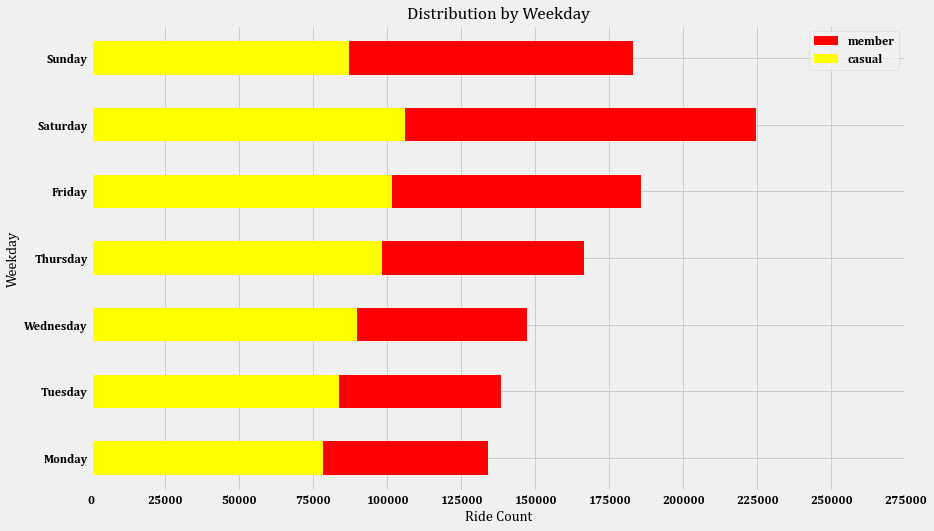

In [70]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)

ax = group_data_by_week_day[['weekday', 'members_c', 'casual_c']].plot(kind='barh', stacked=True, color=['red', 'yellow'], figsize=(13,8))
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = mp.xticks(np.arange(0, 300000, 25000))
_ = mp.xlabel('Ride Count')
_ = mp.ylabel('Weekday')
_ = mp.title('Distribution by Weekday')
_ = mp.legend(["member", "casual"])

0 - Monday   ||    1 - Tuesday   ||    2 - Wednesday   ||    3 - Thursday   ||    4 - Friday   ||    5 - Saturday   ||    6 - Sunday

Most Rides are on the weekend. Members have the most rides during weekend.

Saturday has most rides.

During weekdays, casuals have most rides.

Weekends have the most rides of casual, highest being friday.

In [3]:
group_data_by_start_hour = data.groupby(['start_hour'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_start_hour['mem_cas_p_diff'] = group_data_by_start_hour['members_p'] - group_data_by_start_hour['casual_p']
group_data_by_start_hour['mem_cas_c_diff'] = group_data_by_start_hour['members_c'] - group_data_by_start_hour['casual_c']

In [7]:
group_data_by_start_hour.head()

,start_hour,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,0,12339,1.046090,3368,8971,27.295567,72.704433,-45.408866,-5603
1,1,7445,0.631181,1859,5586,24.969778,75.030222,-50.060443,-3727
2,2,4374,0.370824,1040,3334,23.776863,76.223137,-52.446273,-2294
3,3,2400,0.203470,702,1698,29.250000,70.750000,-41.500000,-996
4,4,2257,0.191347,1038,1219,45.990253,54.009747,-8.019495,-181


<Figure size 1080x1080 with 0 Axes>

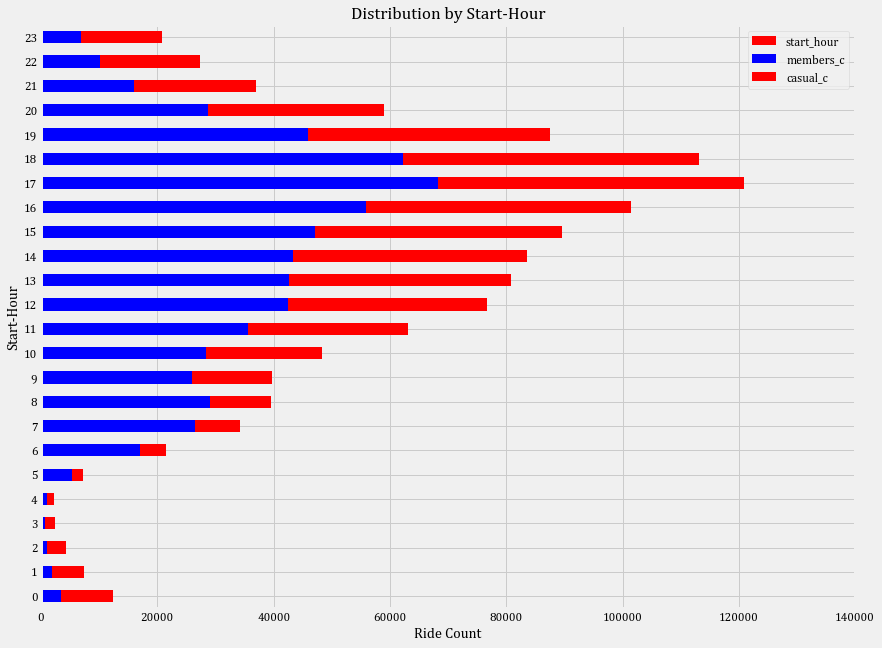

In [51]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)

ax = group_data_by_start_hour[['start_hour', 'members_c', 'casual_c']].plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(13,10), label=['Members', 'Casual'])
ax.set_yticklabels(group_data_by_start_hour['start_hour'])
_ = mp.xticks(np.arange(0, 150000, 20000))
_ = mp.xlabel('Ride Count')
_ = mp.ylabel('Start-Hour')
_ = mp.title('Distribution by Start-Hour')
# _ = mp.legend()

<Figure size 1080x1080 with 0 Axes>

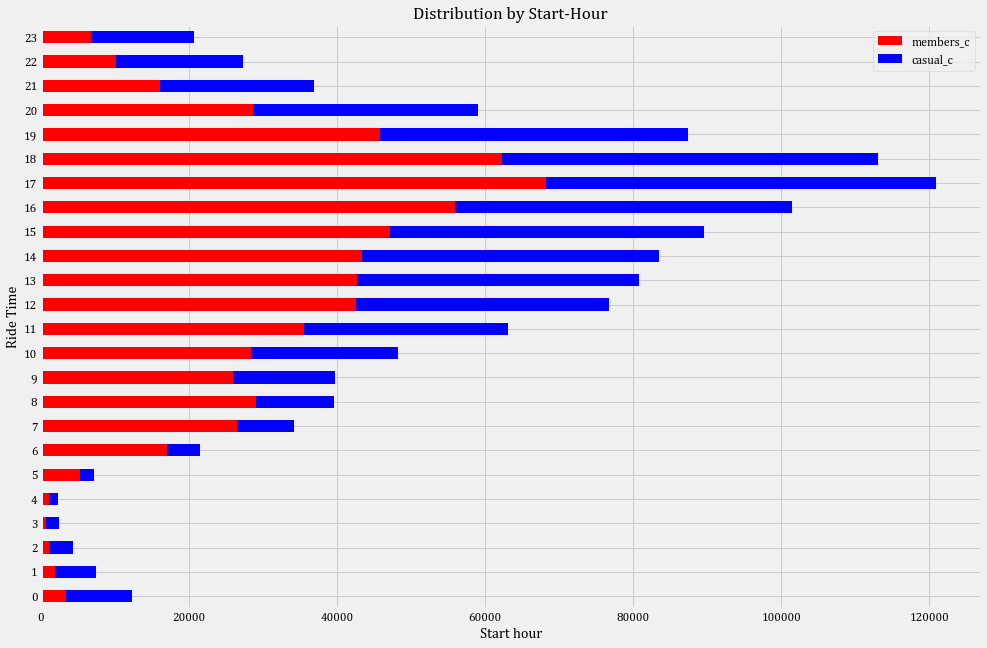

In [18]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)

start_hour_data = pd.DataFrame(group_data_by_start_hour, columns=['members_c','casual_c'], index = group_data_by_start_hour['start_hour'])

start_hour_data.plot.barh(stacked=True, figsize=(15, 10), color=['red', 'blue'])

_ = mp.yticks(group_data_by_start_hour['start_hour'])
_ = mp.title('Distribution by Start-Hour')
_ = mp.ylabel('Ride Time')
_ = mp.xlabel('Start hour')
# plt.show()

Sharp increase in the number of rides in the afternoon till early night.

The number of members is more as compared to the casuals in early morning.

For the rest of the day the number of casuals and members seem almost the same.

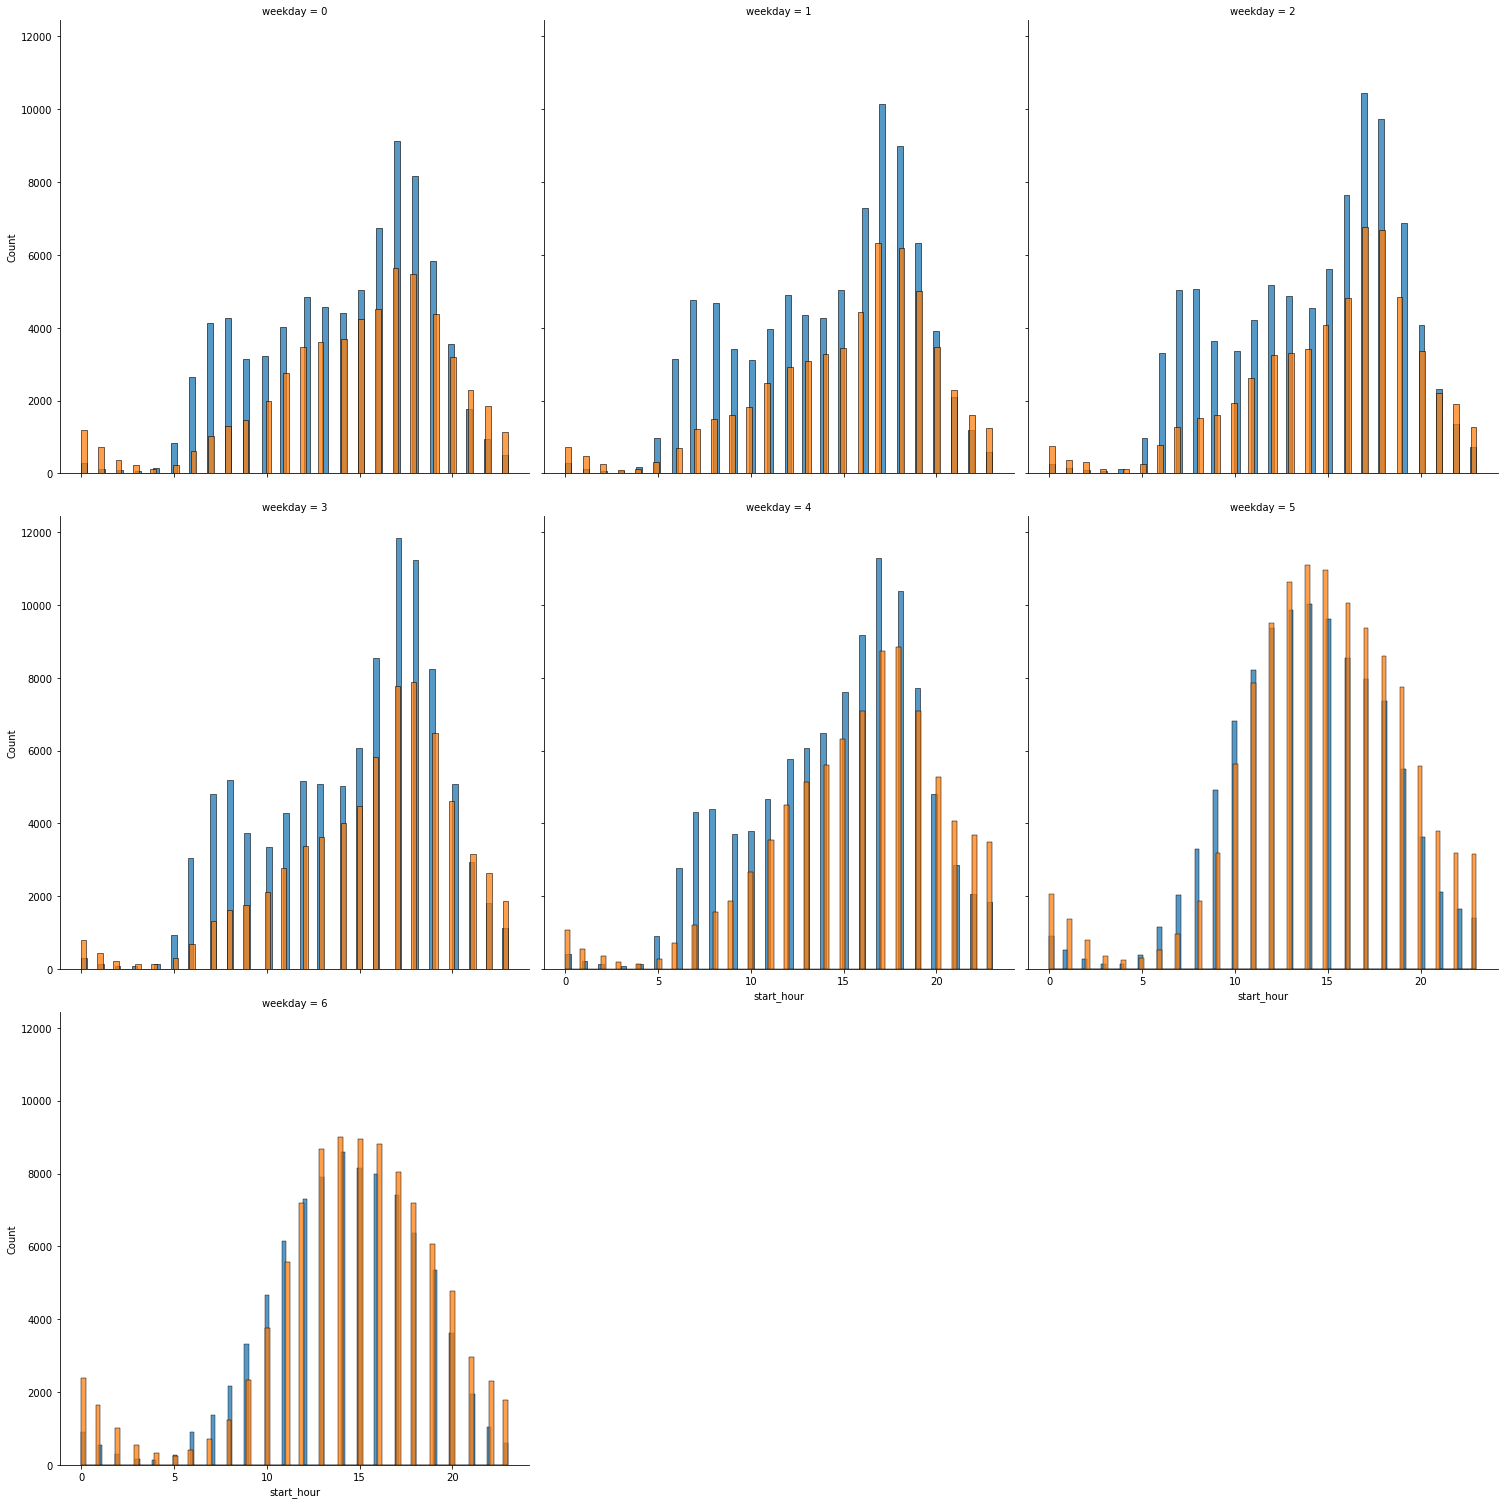

In [8]:
g = sns.FacetGrid(data, col="weekday", height=7, aspect = 1, col_wrap=3, hue='member_casual', legend_out=True)
g.map(sns.histplot, "start_hour")

[subplots_adjust](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)

[Plotting multiple columns from datafram using df.plot](https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/)

Text(0.5, 0.98, 'Distribution by Start Hour by Weekday')

<Figure size 3600x3600 with 0 Axes>

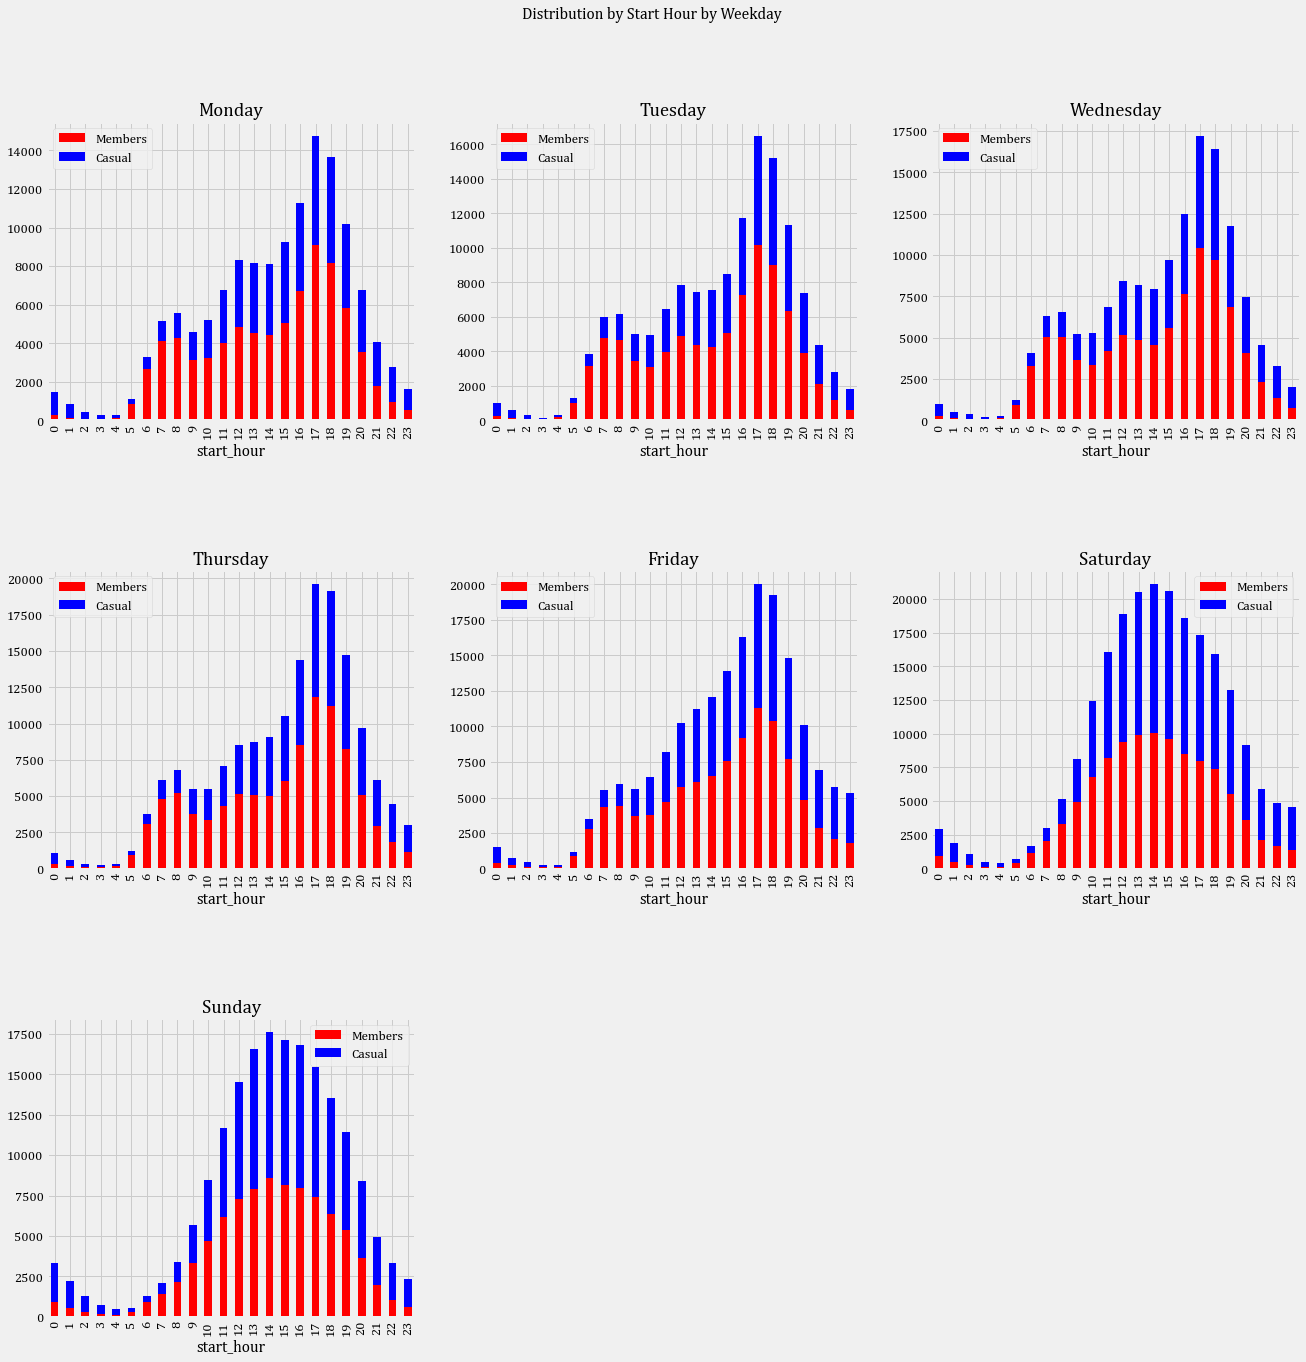

In [50]:
_ = mp.figure(figsize=(50,50))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

weekdays = {0 : 'Monday' , 1 : 'Tuesday' , 2 : 'Wednesday' , 3 : 'Thursday' , 4 : 'Friday' , 5 : 'Saturday' , 6 : 'Sunday'}
day = 0

fig, axs = mp.subplots(3, 3)
mp.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

for i in range(3):
    for j in range(3):
        if day > 6:
            fig.delaxes(axs[i][j])
        else:
            curr_data = data[data['weekday'] == day]

            week_data_by_start_hour = curr_data.groupby(['start_hour'], as_index=False).agg(
                members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
                casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))

            _ = week_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(20,20), ax=axs[i,j], label=['Members', 'Casual'])
            _ = axs[i, j].set_title(f'{weekdays[day]}')
            _ = axs[i, j].legend()

            day += 1
        
mp.suptitle("Distribution by Start Hour by Weekday")


There seems to be a difference between the rides distribution on the weekdays **(Monday to Friday)** and weekends **(Saturday and Sunday)**.

In [3]:
data['type_of_weekday'] = np.where(data['weekday'] < 5, 'Midweek', 'Weekend')
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour,type_of_weekday
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17,Weekend
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17,Midweek
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17,Midweek
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12,Midweek
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10,Weekend


In [14]:
midweek_data = data[data['type_of_weekday'] == 'Midweek']
weekend_data = data[data['type_of_weekday'] == 'Weekend']

midweek_data_by_start_hour = midweek_data.groupby(['start_hour'], as_index=False).agg(
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))

weekend_data_by_start_hour = weekend_data.groupby(['start_hour'], as_index=False).agg(
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))


In [34]:
midweek_data_by_start_hour

,start_hour,members_c,casual_c
0,0,1553,4525
1,1,783,2550
2,2,469,1526
3,3,384,787
4,4,747,653
5,5,4619,1391
6,6,14945,3509
7,7,23070,6049
8,8,23575,7478
9,9,17638,8282


In [35]:
weekend_data_by_start_hour

,start_hour,members_c,casual_c
0,0,1815,4446
1,1,1076,3036
2,2,571,1808
3,3,318,911
4,4,291,566
5,5,671,542
6,6,2055,921
7,7,3413,1666
8,8,5452,3095
9,9,8246,5524


<Figure size 1080x576 with 0 Axes>

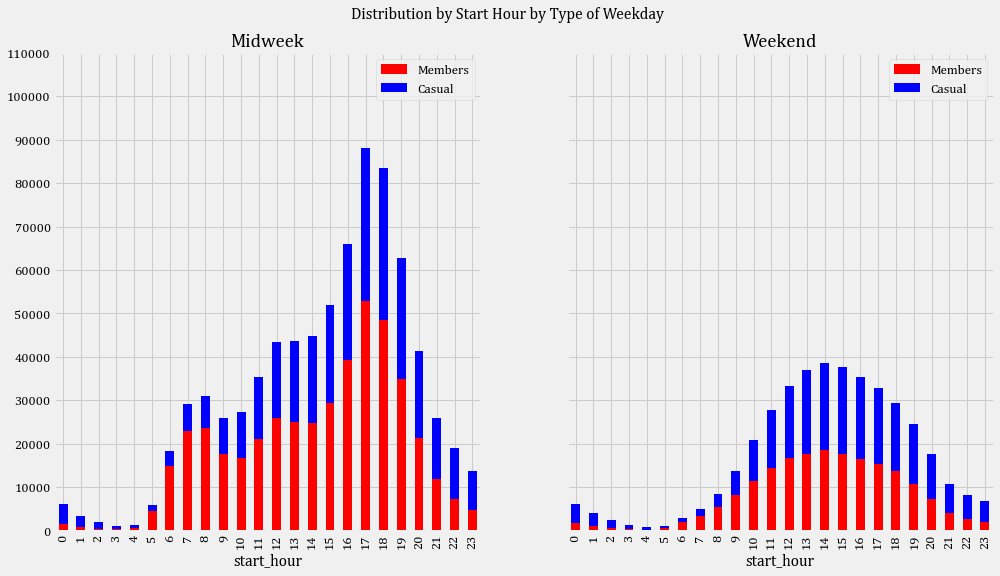

In [33]:
_ = mp.figure(figsize=(15,8))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

fig, (ax1, ax2) = mp.subplots(1, 2, sharey=True)
mp.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

_ = midweek_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(15,8), ax=ax1, label=['Members', 'Casual'])
_ = ax1.set_title('Midweek')
_ = ax1.legend()


_ = weekend_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(15,8), ax=ax2, label=['Members', 'Casual'])
_ = ax2.set_title('Weekend')
_ = ax2.legend()

_ = mp.yticks(np.arange(0, 120000, 10000))
_ = mp.suptitle("Distribution by Start Hour by Type of Weekday")


The number of rides during weekdays is very high as compared to the weekends but this is just because the number of days included in the weekdays is 5 and for weekends is just 2.

During the weekdays the member rides are very high as compared to the casuals.

The member rides increase after 5 am and remain steady till around 3 pm and then again increase after 4 pm till 7 pm. (Maybe they are using it for their commute to work)


During the weekends the casual rides are almost as same as member rides. (Maybe they are using it as a recreational activity)

In [36]:
group_data_by_rideable_type = data.groupby(['rideable_type'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_rideable_type['mem_cas_p_diff'] = group_data_by_rideable_type['members_p'] - group_data_by_rideable_type['casual_p']
group_data_by_rideable_type['mem_cas_c_diff'] = group_data_by_rideable_type['members_c'] - group_data_by_rideable_type['casual_c']

group_data_by_rideable_type

,rideable_type,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,docked_bike,1177600,99.835952,643889,533711,54.678074,45.321926,9.356148,110178
1,electric_bike,1935,0.164048,1095,840,56.589147,43.410853,13.178295,255


In [38]:
data['rideable_type'].value_counts()

docked_bike      1177600
electric_bike       1935
Name: rideable_type, dtype: int64

<Figure size 1080x1080 with 0 Axes>

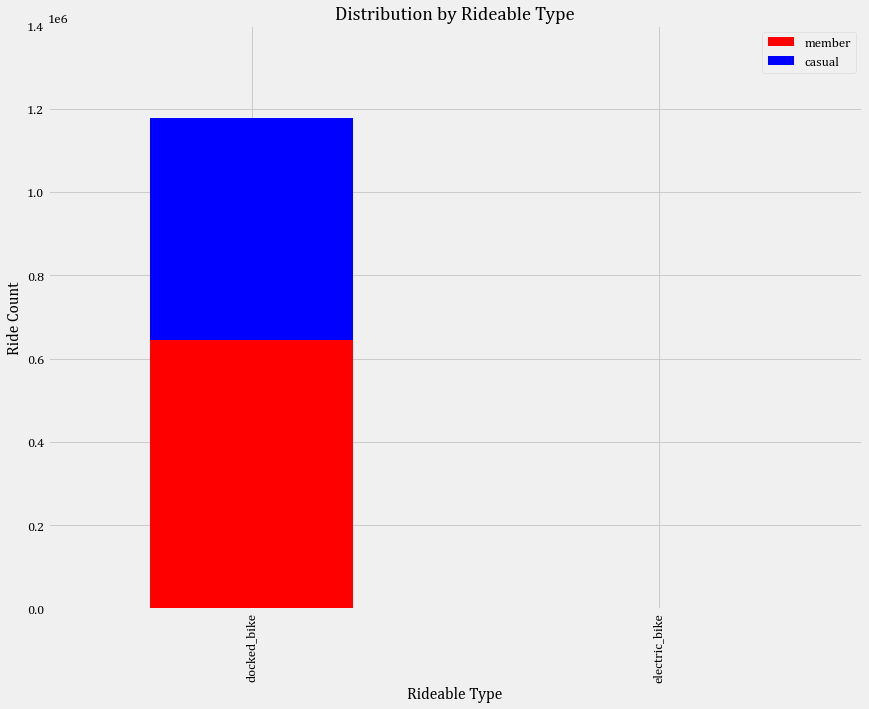

In [50]:
_ = mp.figure(figsize=(15,15))

ax = group_data_by_rideable_type[['rideable_type', 'members_c', 'casual_c']].plot(x='rideable_type', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(13,10), label=['Members', 'Casual'])
ax.set_xticklabels(group_data_by_rideable_type['rideable_type'])
_ = mp.yticks(np.arange(0, 1500000, 200000))
_ = mp.ylabel('Ride Count')
_ = mp.xlabel('Rideable Type')
_ = mp.title('Distribution by Rideable Type')
_ = mp.legend(["member", "casual"])

Either most of the riders prefer the docked bike or most of the bikes owned by the company are docked bikes.

In [33]:
pd.DataFrame(np.percentile(data['ride_time'], [10, 97, 98, 99, 99.95]))

,0
0,6.000
1,119.000
2,144.000
3,193.000
4,2531.699


In [42]:
np.percentile(data['ride_time'], 99.97)

4612.677600000054

In [43]:
np.percentile(data['ride_time'], 5)

4.0

In [5]:
fifth_percentile = np.percentile(data['ride_time'], 5)
nintyfifth_percentile = np.percentile(data['ride_time'], 95)

reduced_data = data[(fifth_percentile <= data['ride_time']) & (data['ride_time'] <= nintyfifth_percentile)]
print(f"{data.shape[0] - reduced_data.shape[0]} rows removed")
reduced_data.head()

107018 rows removed


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [6]:
reduced_data.groupby('member_casual')['ride_time'].agg(mean=np.mean,
                                                       first_quarter=lambda x:x.quantile(0.25),
                                                       median=np.median,
                                                       third_quarter=lambda x:x.quantile(0.75),
                                                       IQR=lambda x:x.quantile(0.75) - x.quantile(0.25))

,mean,first_quarter,median,third_quarter,IQR
member_casual,,,,,
casual,29.117079,14.0,23.0,39.0,25.0
member,17.865891,9.0,15.0,24.0,15.0


[Box Plot Viz](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)

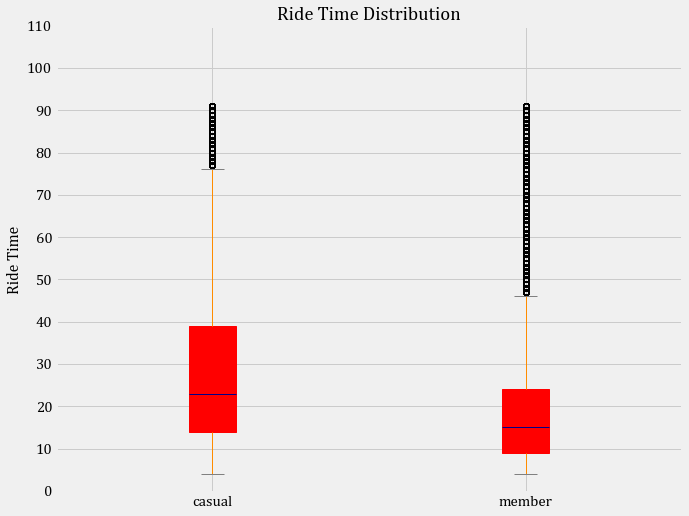

In [7]:
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

props = dict(boxes="Red", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")

box = reduced_data.plot(kind='box', by='member_casual', column='ride_time', color = props, fontsize = 15, figsize=(10,8), patch_artist=True)
_ = mp.ylabel('Ride Time')
_ = mp.yticks(np.arange(0, 120, 10))
_ = mp.title('Ride Time Distribution')

Casual Riders have more riding time as compared to the Members.

In [ ]:
member_ride_time = reduced_data[]

[Figure Size with Subplots](https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots)

[Xticks in Subplots](https://stackoverflow.com/questions/19626530/how-to-set-xticks-in-subplots)

0 - Monday   ||    1 - Tuesday   ||    2 - Wednesday   ||    3 - Thursday   ||    4 - Friday   ||    5 - Saturday   ||    6 - Sunday

<Figure size 2160x2160 with 0 Axes>

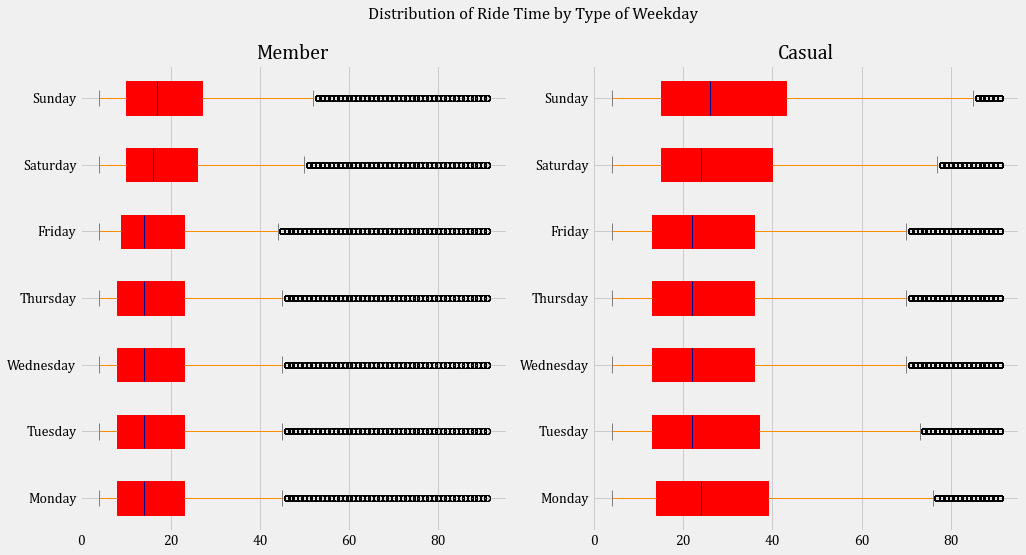

In [23]:
_ = mp.figure(figsize=(30,30))
_ = mp.style.use("fivethirtyeight")

fig, (ax1, ax2) = mp.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(15)

_ = reduced_data[reduced_data['member_casual'] == 'member'].plot(kind='box', by = 'weekday', column = 'ride_time', color=props, figsize=(10,15), ax=ax1, vert=False, patch_artist=True)
_ = ax1.set_title('Member')
_ = ax1.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

_ = reduced_data[reduced_data['member_casual'] == 'casual'].plot(kind='box', by = 'weekday', column = 'ride_time', color=props, figsize=(10,15), ax=ax2, vert=False, patch_artist=True)
_ = ax2.set_title('Casual')
_ = ax2.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

_ = mp.suptitle("Distribution of Ride Time by Type of Weekday")


There are more number of casual riders and their ride time has a bigger range as compared to the members throughout the week.

The reason for this might be that the members are using it as a routine (mostly for work commute) while the casuals are using it for multiple reasons.



<Figure size 2160x2160 with 0 Axes>

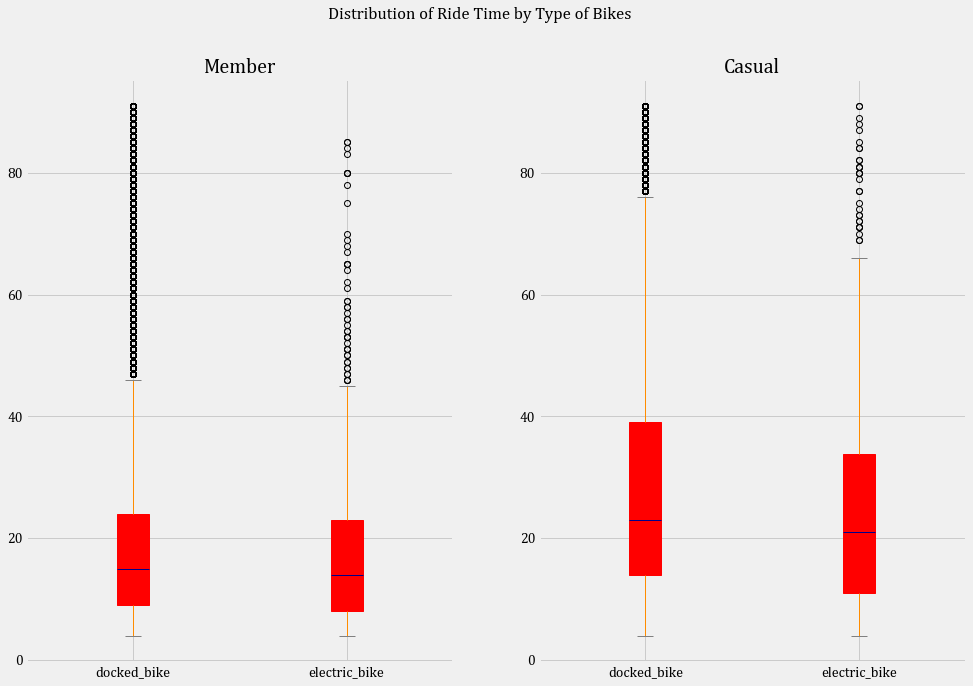

In [33]:
_ = mp.figure(figsize=(30,30))
_ = mp.style.use("fivethirtyeight")

fig, (ax1, ax2) = mp.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

bike_types = list(reduced_data['rideable_type'].unique())

_ = reduced_data[reduced_data['member_casual'] == 'member'].plot(kind='box', by = 'rideable_type', column = 'ride_time', color=props, figsize=(10,15), ax=ax1, patch_artist=True)
_ = ax1.set_title('Member')
_ = ax1.set_xticklabels(bike_types)

_ = reduced_data[reduced_data['member_casual'] == 'casual'].plot(kind='box', by = 'rideable_type', column = 'ride_time', color=props, figsize=(10,15), ax=ax2, patch_artist=True)
_ = ax2.set_title('Casual')
_ = ax2.set_xticklabels(bike_types)

_ = mp.suptitle("Distribution of Ride Time by Type of Bikes")


In [52]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10
